<a href="https://colab.research.google.com/github/ShwetaRajput08/Machine-Learning-for-Intelligent-System/blob/main/GSFCU_IntrotoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentiment Classification**

Problem Statement: Classify the sentence into positive or negative sentiment






Data: Movie Reviews dataset from iMDB.


runtime -> change runtime type -> T4 gpu

In [ ]:
pip install numpy pandas matplotlib seaborn nltk scikit-learn

##Importing the packages and Downloading the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize # split into tokens
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [ ]:
# Load IMDb dataset using nltk
from nltk.corpus import movie_reviews


nltk.download('punkt')
nltk.download('punkt_tab') # helps you tokenize
nltk.download('stopwords') # a, the, it
nltk.download('movie_reviews') # :D


# Create a DataFrame from the movie reviews
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
df = pd.DataFrame(documents, columns=['review', 'sentiment'])

# Display first few rows
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


                                              review sentiment
0  plot : two teen couples go to a church party ,...       neg
1  the happy bastard's quick movie review \ndamn ...       neg
2  it is movies like these that make a jaded movi...       neg
3   " quest for camelot " is warner bros . ' firs...       neg
4  synopsis : a mentally unstable man undergoing ...       neg


##Data Preprocessing

In [ ]:
# Data Cleaning
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower() #good , GOOD -> good
    #  bastard
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return ' '.join(words)

df['review'] = df['review'].apply(preprocess_text)

# Encode sentiment labels
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0})


In [ ]:
# Check unique values in 'sentiment' column
print(df['sentiment'].unique())

# Count occurrences of each category
print(df['sentiment'].value_counts())


[0 1]
sentiment
0    1000
1    1000
Name: count, dtype: int64


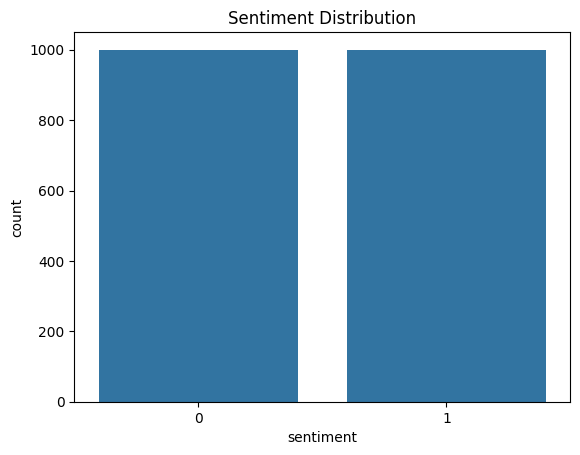

In [ ]:
# Sentiment distribution
sns.countplot(x='sentiment', data=df, hue_order=['positive', 'negative'])
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
#Try some more visualizations




#code here

##Splitting the data

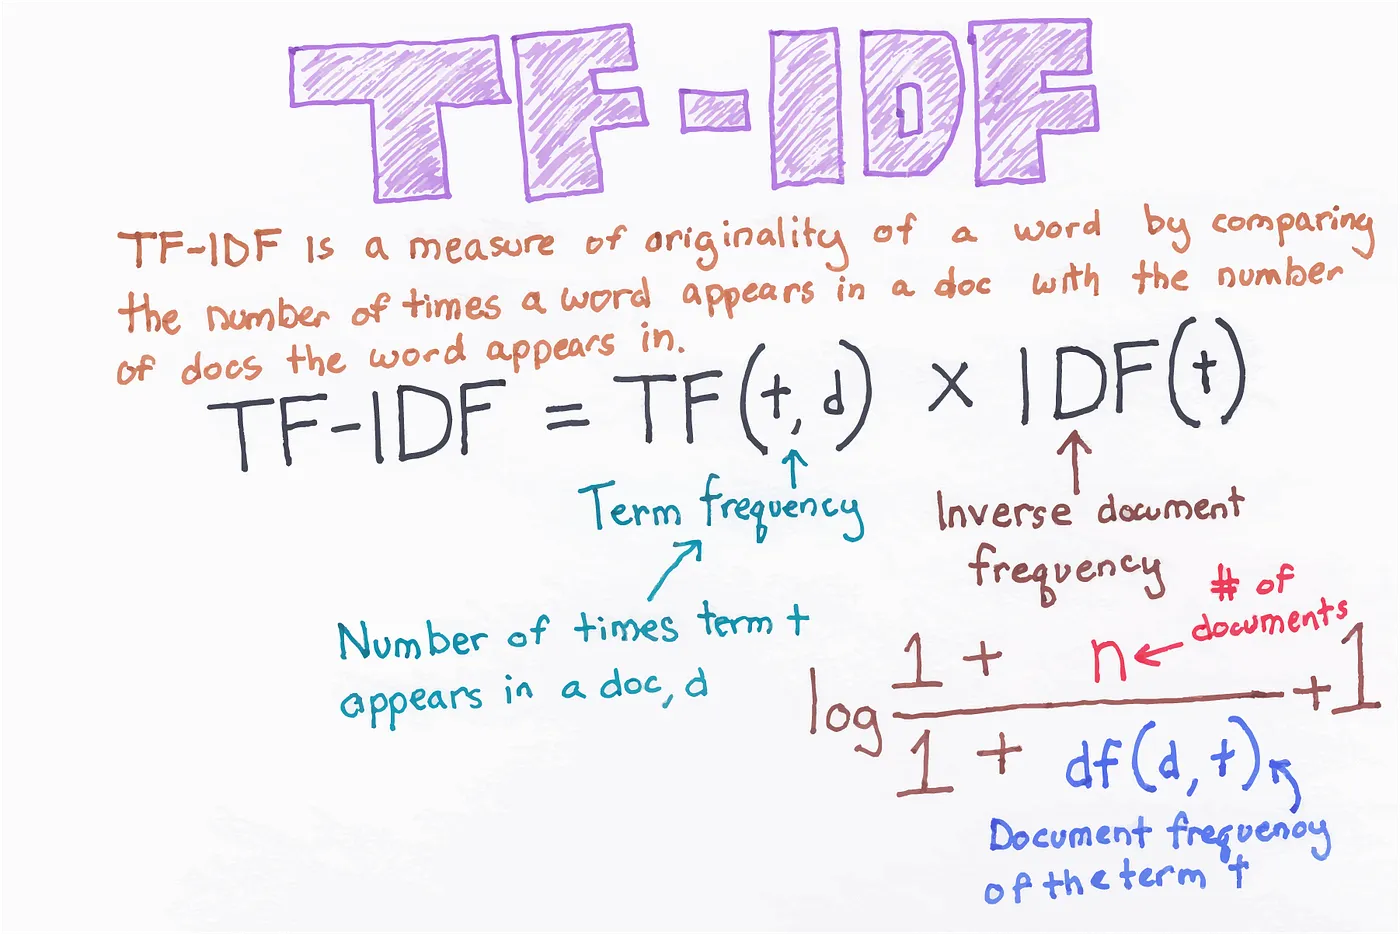

In [ ]:
# Split data
X = df['review']
y = df['sentiment']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000) # make an instance // initialize object
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
#Try tf-idf with different n-grams

#vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

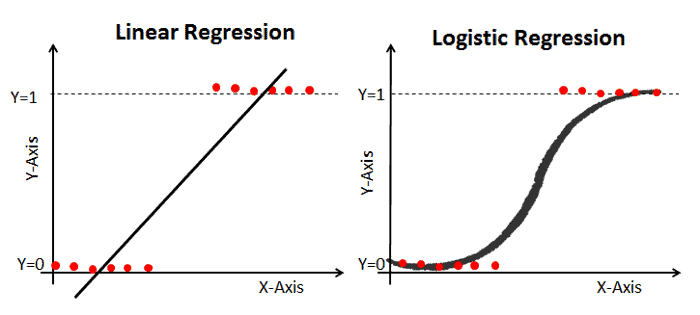

In [ ]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000) # instance of the object
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

##Evaluation

In [ ]:
# Validate the model
y_val_pred = model.predict(X_val_vec) # 0,1,1,0
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.85      0.78      0.82       153
           1       0.79      0.86      0.82       147

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [ ]:
# Test the model
y_test_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.81      0.84      0.83       149
           1       0.84      0.81      0.82       151

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_vec)[:, 1])
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')


Accuracy: 0.8233333333333334
Confusion Matrix:
[[125  24]
 [ 29 122]]
ROC AUC: 0.892084092626339


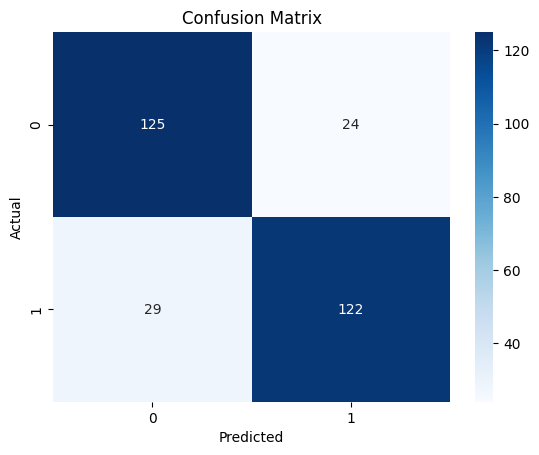

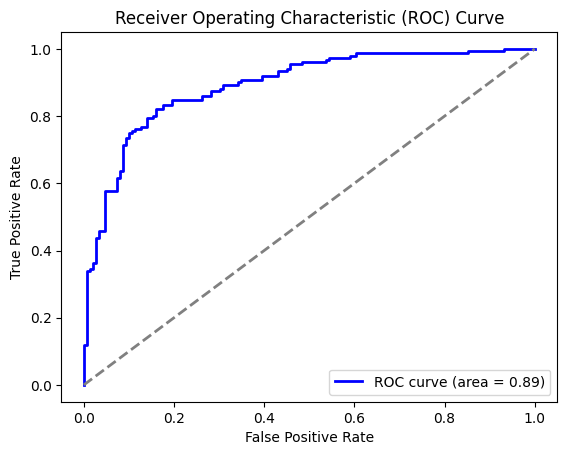

In [ ]:
# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Analysis of misclassified examples


misclassified = X_test[y_test != y_test_pred]
print("Misclassified examples:")
print(misclassified.head())

Misclassified examples:
785     film touted exploring relationships black sexu...
978     anna king least fourth film adaptation margare...
309     one demanded david duchovny romantic comedy la...
1196    jay silent bob strike back kevin smith swan so...
1221    expand final fifteen minutes home alone film g...
Name: review, dtype: object


In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train_vec, y_train)

# Extract feature names
feature_names = vectorizer.get_feature_names_out()

# Get classifier coefficients
coefficients = classifier.coef_[0]

top_n = 10  # Number of top features to extract
top_positive_indices = np.argsort(coefficients)[-top_n:]
top_negative_indices = np.argsort(coefficients)[:top_n]

top_positive_features = [(feature_names[i], coefficients[i]) for i in top_positive_indices]
top_negative_features = [(feature_names[i], coefficients[i]) for i in top_negative_indices]

# Display top features for positive class
print(f"Top features for 'positive' class:")
for feature, coef in top_positive_features:
    print(f"  {feature}: {coef:.4f}")

# Display top features for negative class
print(f"Top features for 'negative' class:")
for feature, coef in top_negative_features:
    print(f"  {feature}: {coef:.4f}")

Top features for 'positive' class:
  perfectly: 0.9455
  performance: 0.9566
  excellent: 0.9617
  seen: 0.9719
  quite: 1.0125
  also: 1.0399
  well: 1.1467
  truman: 1.1914
  life: 1.4932
  great: 1.6762
Top features for 'negative' class:
  bad: -2.8970
  plot: -1.9347
  worst: -1.5174
  stupid: -1.3644
  boring: -1.3358
  nothing: -1.3264
  supposed: -1.2087
  movie: -1.1316
  unfortunately: -0.9829
  poor: -0.9748


In [ ]:
# write your own code :D